In most, if not all institutions, management keeps track of the overall health of the business through the result of measurements called **metrics**. A ubiquitous and familiar example of a metric is `revenue`. In retail, a very popular metric is the `average order` value; and in subscription-based products, `churn rate` (which we'll learn about in this file) is crucial.

Although we're focusing on the context of businesses, metrics are also important in other contexts, and the same principles apply. Examples of metrics that are followed by governments are `GDP`, `inflation`, and `unemployment` rate.

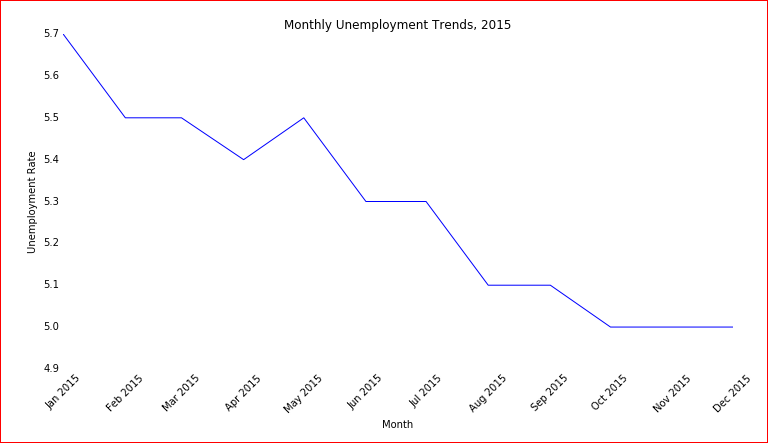

We'll learn about what makes a good metric, and we'll explore some metrics in different scenarios.

One thing that's important to understand: Metrics are observed across time. Metrics are calculated separately at specific points in time, but are understood in a chronological context.

Common time frames in which to calculate metrics are days, weeks, or months. Which time frame to use depends on factors like importance, data availability, and how dynamic the metric is.

So what makes a good metric? There is a certain degree of subjectivity, and different people may disagree with certain aspects of answers to this question. 

A good metric should have the following characteristics:

**Accurate**

It should go without saying that metrics should be accurate. Remember how, in the last file ,we abandoned the estimation of the impact of the project because we couldn't properly measure it? By the same token, if a concept can't be adequately measured, then it shouldn't be a metric.

**Simple and intelligible**

Metrics are meant to be read and understood at a glance. Metrics are often presented in the context of a dashboard or report containing other metrics. There is much to read and understand, so it should be easy to read each of the dashboard's components. Think of metrics as the headline to a story.

Because metrics are often divulged to broad audiences, they should be targeted to a common denominator.

**Easy to drill down into**

Metrics are meant to monitor how a business is doing. Sometimes they will reveal that something is going exceptionally well, or exceptionally bad. In either case we will be interested in knowing what factors contributed to the change in the metric. In other words, metrics are headlines, we need to be able to read the story.

Since metrics typically are comprised of components (for example, `profits` can be seen has having two components: `revenue` and `costs`), we need to be able to drill down into them to understand what the change is attributed to.

**Actionable**

The point of measuring the health of the business is not just so we know if things are going well or not. The goal is to act on things if they're not going in the direction we want. For this reason, a good metric needs to be actionable.

For example, it's known that weather has an impact on sales in brick-and-mortar stores, but we can't change the weather. A better option — and one we can act on — would be to measure the relevancy of our products based on the weather.

**Dynamic**

Metrics need to be dynamic, they need to change over time. This characteristic is somewhat related to the above, but merits some distinction.

Many companies rent their offices instead of buying them. How much companies pay on leases is something that can potentially be acted on, in this sense it is actionable. However, since leases are legal contracts with relatively extended periods of time, this metric shouldn't be tracked — it's not dynamic enough.

**Standardized**

The broader the reach of a metric (in terms of its audience), the more the metric's elementary components need to be standardized, so that everyone sees the same thing. Not doing this causes inconsistency and misinformation, potentially resulting in unwanted outcomes.

To give a couple of examples:

* Should Amazon count a sale as such the moment the customer places the order? When the payment goes through? When the order leaves the warehouse? When it is delivered? Even something as simple as the concept of sale can be ambiguous.

* In [supply chain management](https://en.wikipedia.org/wiki/Supply_chain_management), **lead time** is defined as "the amount of time that passes from the start of a process until its conclusion."Piggybacking from the previous example, should the lead time go up to the point where the order leaves the warehouse or until the customer receives it? Given that Amazon outsources the deliveries to companies like UPS, they don't have much control over what happens once the order is "on the road." However, from a customer satisfaction perspective, how long a customer takes to receive the order is definitely very relevant.

Conflicting definitions should be resolved when a metric is monitored by many people in the company.

**Business oriented**

A metric should be relevant for the business. Metrics need to be adjusted to the current needs of the business. Take, for instance, Netflix. They possibly tracked how much business they were losing to piracy. When streaming became easily available and relatively cheap, piracy stopped being a serious issue and there (possibly) was no need to track it anymore.

We'll learn about `Net Promoter Score`, more commonly known as **NPS**. **NPS** is a [customer sucess](https://en.wikipedia.org/wiki/Customer_success) metric that quantifies customer satisfaction. We've probably been asked to fill in surveys that contained some variation of the question "How likely are you to recommend this product to a friend?" and whose possible answers were 11 numbers on a scale from 0 to 10.

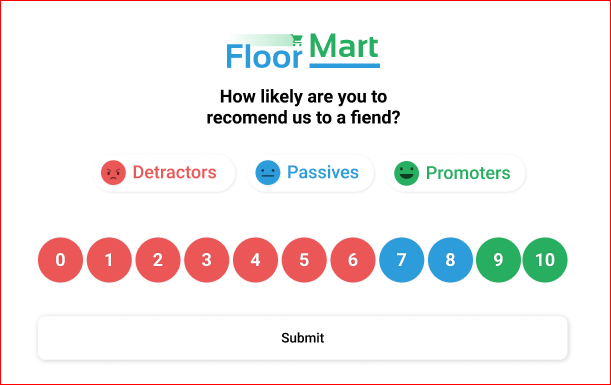

Customers who pick:

* Anything from 0 through 6 are called **detractors**;
* 7 or 8 are called **passives**;
* 9 or 10 are called **promoters**;

By proxy each of these categories are gauged as follows:

* `Detractors`: Unhappy customers who share their negative experience with the product or company; they may actively spread negative feedback.

* `Passives`: Customers who may be pleased with the product, but aren't actively promoting it and will quickly turn to the competition if a better opportunity presents itself.

* `Promoters`: Extremely satisfied customers who will act as brand ambassadors.

**NPS** is then calculated as the **percentage of promoters** minus the **percentage of detractors**.

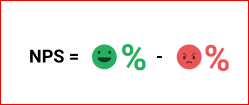

In [1]:
def categorize(score):
    """Returns NPS category"""
    if score in range(0,7):
        return "Detractor"
    elif score in (7, 8):
        return "Passive"
    elif score in (9,10):
        return "Promoter"
    return None

Note that **NPS** can range between `-100%` (if everyone is a `detractor`) and `100%` (if everyone is a `promoter`).

Let's see a small example:

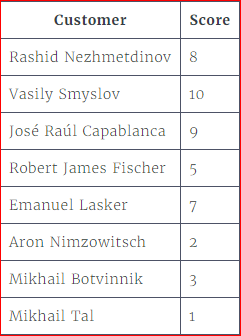

We have:

* 8 customers
* 2 promoters: Capablanca and Smyslov;
 * Therefore the percentage of promoters is 25%
* 2 passives: Nezhmetdinov and Lasker
* 4 detractors: Fischer, Nimzowitsch, Botvinnik and Tal
 * Therefore the percentage of detractors is 50%

The **NPS** is `25-50`, or `-25`. Usually people do not include the percentage sign and just say that the **NPS** is `-25`, but it's simply an aesthetics choice.

We are now going to compute the net promoter score using a dataset. It has three columns:

* `event_date`: The date and time in which customers completed the survey
* `user_id`: A customer identifier
* `score`: Their answer to the question featured above

The dates pertain the year of 2020 only and the dataset has no missing values, nor does it require any major data cleaning. The data is stored in the file `nps.csv`. Let's read it into a dataframe.

In [3]:
import pandas as pd

In [3]:
df = pd.read_csv("nps.csv", parse_dates=["event_date"])
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


We mentioned earlier that metrics are tracked across time. In this exercise we'll track **NPS** month by month.

In [18]:
# Create a numeric column in df called yearmonth 
# that stores the year and the month of each row in the yyyymm format.

year = df["event_date"].dt.year
month = df["event_date"].dt.month
df["yearmonth"] = 100*year + month
df["yearmonth"].head()

0    202001
1    202001
2    202001
3    202001
4    202001
Name: yearmonth, dtype: int64

In [19]:
# Create a column in df called "category" 
# that assigns the category corresponding to its score to each row, 
# as per the function created above.

df["category"] = df["score"].apply(categorize)
df["category"].head()

0      Passive
1     Promoter
2     Promoter
3      Passive
4    Detractor
Name: category, dtype: object

Create a new dataframe with the **NPS** for each month:
1. Assign to nps the result of using `df.pivot_table()` with:
 * `yearmonth` as the index
 * `category` as a column
 * The string `size` as an aggregating function

In [40]:
nps = df.pivot_table(index = "yearmonth", columns= "category", aggfunc="size")
nps.head()

category,Detractor,Passive,Promoter
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191


In [41]:
# Create a new column in nps whose values are the sum of the values
# of each row to get the total number of responses for the month.
nps["total_responses"] = nps.sum(axis="columns")

In [42]:
nps["total_responses"].head()

yearmonth
202001    328
202002    273
202003    230
202004    301
202005    307
Name: total_responses, dtype: int64

In [43]:
# Subtract detractors from the promoters and 
# divide the result by the total_responses column. 

nps["nps"] = (nps["Promoter"]-nps["Detractor"])/nps["total_responses"]

In [44]:
nps["nps"] = (100*nps["nps"]).astype(int)

We finished with casting `nps` as an integer. As we mentioned, this is how the net promoter score is usually presented.

Typically, when presenting a metric, it is done so in a dashboard, together with other relevant metrics. The following is a customer satisfaction dashboard taken from [SlideModel.com](https://slidemodel.com/)

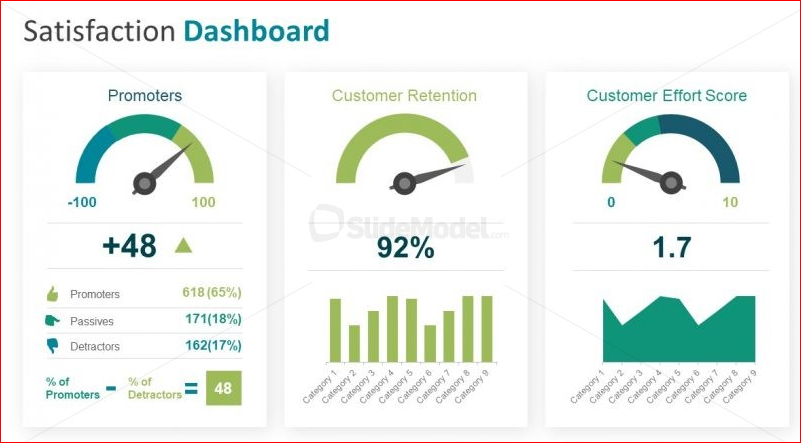

It is lacking chronological context. The **NPS** is `48`; did it grow or did it decrease? How is it doing relative to the past few months?

Let's create a graph for nps:

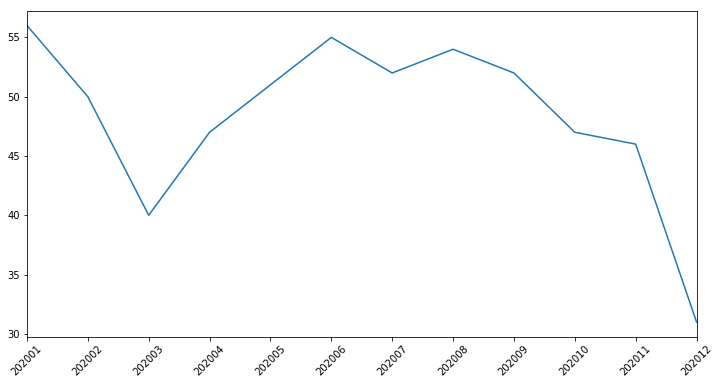

In [58]:
import matplotlib.pyplot as plt

ax = nps.reset_index().plot(kind = "line", x="yearmonth",y="nps",figsize=(12,6), legend = False)
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.set_xlabel("") # or ax.axes.get_xaxis().set_label_text("")
plt.show()

Now suppose it is **December 2020**, the **NPS** is just above `30`. We can immediately tell it is doing bad, at least in view of the last few months. What to do about this? This is where the `"actionable"` characteristic comes in.

If we want to improve **NPS**, we must improve **customer satisfaction**. The company can begin by surveying its customers to get feedback and gain some understanding as to what's driving this apparent insatisfaction. In fact, it's standard practice in **NPS** surveys to have a freeform text box where customers can share their feedback with us. Once we have this feedback, we can act upon it as see how it impacts our **NPS**; hopefully it will improve it.

It can also happen that the result of the survey shows that what led to this dissatisfaction was a recent change in the product. This is something to watch out for even before the survey is completed.

Also note how **NPS** ticks several, if not all, of the boxes of what makes a good metric: it is `accurate`, `simple` and `intelligible`, easy to drill down into (we know the score of every customer), it's `dynamic`, and so on.

Every metric has its pros and cons. It may seem like **NPS** is too simplistic a model to be useful, but it is in fact positively correlated with business growth. `Fred Reichheld`, a business strategist, even called it **"the one number we need to grow"**.

**Cons** include:

* Requiring feedback from customers for it to be actionable — and most customers don't give feedback.
* It doesn't account for the influence of each respondent, or the influence of each category of respondents. Perhaps unsatisfied customers are more likely to voice their unhappiness on social media than promoters are to voice how happy they are, for instance.

In December, the **NPS** was very low, relative to the past few months. But is it actually low? Perhaps it was the other months that were high. Gauging how good an **NPS** is requires taking into account other factors, like geographic location and industry.

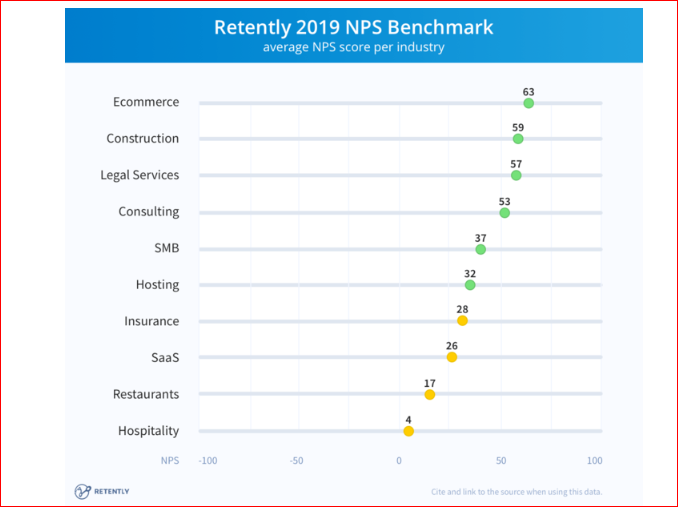

As we can see, net promoter scores vary greatly across industries — telecommunication companies (unlisted above) even average a **non-positive NPS**! In order to gain insight into how a **NPS** fares, we must take these factors into account.

Let's now move on to learning about **another metric!**

Simply put, when a customer stops being a customer, we say the customer has churned. What does it mean to say that a customer stopped being a customer? 

Sometimes it is obvious (like in the case of subscription based services — think Netflix or SaaS companies), but how can we tell when a customer churned in the case of an aquatic sports equipment shop, for instance? We won't answer this question here.

Churn rate is the percentage of customers that churned in a given time period.

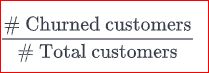

Let's first get to know the data we'll be working with, and dive into the `ins` and `outs` of churn rate later.

We purchased our local gym from its previous owners. It was a great deal as their mismanagement led the owners to decide that the business wasn't profitable; we as a customer and entrepreneur were able to see the unfulfilled potential.

In January of 2013, the transaction was complete and we immediately took the opportunity to make a New Year's Resolution promo where people could sign up for the whole year and pay `$`500 instead of `$`50 per month. We also renamed the gym as `Muscle Labs` — not only are we fit, we also are a creative genius.

We decided to use the traditional subscription model used in gyms where customers pay an installment per month to access the gym. A customer churns when they elect not to pay the installment — this makes our life easier in implementing the concept for churn.

The dataset we'll be using consists of fictitious data and is stored in the file `muscle_labs.csv`.

Here's the data dictionary:

* `id`: The subscription ID; a customer can appear multiple times in this dataset by virtue of having multiple subscriptions instead of a continuous one
* `customer_id`: The customer's ID
* `end_date`: The actual (if in the past) or estimated (if in the future) end date of the subscription
* `start_date`: The subscription start date
* `subscription_period`: Specifies whether it is a monthly or annual subscription
* `price`: The price

Let's start by creating a dataset that tracks the number of churned customers per month.

In [59]:
subs = pd.read_csv("muscle_labs.csv", parse_dates=["end_date", "start_date"])
subs["churn_month"] = subs["end_date"].dt.year*100 + subs["end_date"].dt.month

In [61]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


In [63]:
monthly_churn = pd.DataFrame({"total_churned": subs.groupby("churn_month").size()})
monthly_churn.head()

,total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37


Note that because of the way we created `monthly_churn`, it can only contain months in which customers have churned — it could potentially be missing a few months. Let's inspect the `start_date` column in subs to figure out what is the earliest month we have data in.

In [64]:
print(subs["start_date"].min())

2011-01-05 13:55:00


We may have noticed that our data in `monthly_churn` starts at March 2011. Given the above result, we conclude that we're missing at least two months. Above, we mentioned that the current month is December 2014.

Let's create a dataframe with a column that accounts for all the relevant months:

In [70]:
years = list(range(2011,2015))
months = list(range(1,13))

yearmonths = [y*100+m for y in years for m in months]
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


Since we are in the beginning of December of 2014, we still don't have all the data for the current month, we'll get rid of the last entry when creating our dataframe:

In [71]:
yearmonths = yearmonths[:-1]
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411]


In [72]:
churn = pd.DataFrame({"yearmonth": yearmonths})
churn.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


Let's now populate this dataframe with the data in `monthly_churn`

In [75]:
# Use the pandas.merge() function to populate churn with the data already present in monthly_churn:
churn = pd.merge(left = churn, right = monthly_churn, how = "left",  left_on="yearmonth", 
                 right_index=True)
churn.head()

,yearmonth,total_churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [76]:
churn.fillna(0, inplace=True)

In [77]:
churn["total_churned"] = churn["total_churned"].astype(int)

In [78]:
churn.head()

,yearmonth,total_churned
0,201101,0
1,201102,0
2,201103,8
3,201104,16
4,201105,29


Let's recall the definition of churn rate:

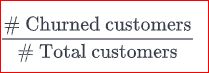

Other than the numerator, which we've already dealt with, this seems like an innocuous definition, but it is not. Let's see why.

The number of customers can change throughout the month. Potentially even everyday, and depending on implementation details, it can change from one minute to the other. So how do we decide on the denominator? The following is a non-exhaustive list of several common options:

* The number of customers at the beginning of the time period.
* The mean between the number of customers at the beginning of the time period and at the end of the same period.
* The average throughout the time period — for example, if the chosen time frame is a week, sum the number of customers from Monday through Sunday and divide by seven.

Each definition has its pros and cons and what definition to use is something that depends on the details of the product and the business. Having said this, it's better to use any reasonable definition than be stuck on choosing the absolute best one and not move on with getting this metric.

In this scenario we'll use the the first definition: `The number of churned customers divided by the number of customers at the beginning of the time period`. Its simplicity bring us a couple of important advantages:

* It's easy to understand
* It's easy to drill down into


In the following exercise our strategy will be based on determining the number of customers at the beginning of the month. This is equivalent to finding the number of customers at the end of the previous month — we'll do the latter.

More concretely, given a month `ym` (from `yearmonth` in churn), we'll count the number of subscriptions where `start_date` comes before the first day of `ym`, and where `end_date` is after the last day of the previous month (which is to say that the `end_date` is greater than or equal to the first day of `ym`).

This can be done by counting the number of rows of subs where `start_date` is smaller than the first day of the month and where `end_date` is greater. For each month we'll want the number of customers that fall under the situation in the diagram below. Each calendar day is represented by a gray square.

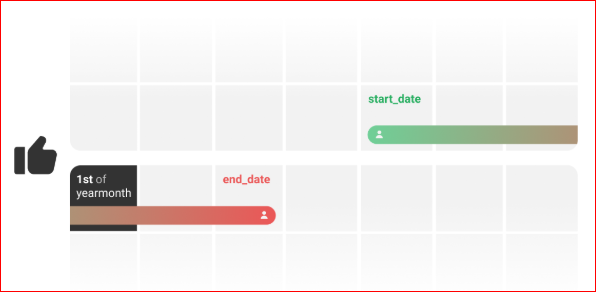

And we'll ignore those who fall under any of the two following situations:

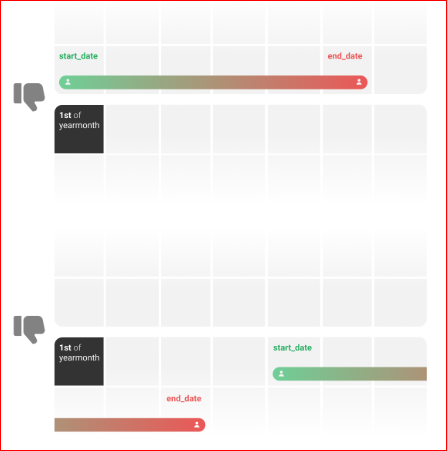

In [79]:
# Create a function that takes as input an integer representing a month in the format yyyymm 
# and returns the number of rows in subs satisfying all of the following criteria:

# 1. start_date occurred before the first day of the given month
# 2. end_date is later than the last day of the previous month

import datetime as dt

def get_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    return ((subs["start_date"] < date) & (date <= subs["end_date"])).sum()

In [80]:
churn["total_customers"] = churn["yearmonth"].apply(get_customers)

In [81]:
# churn["total_customers"] = churn["yearmonth"].apply(get_customers)

churn["churn_rate"] = churn["total_churned"] / churn["total_customers"]

In [82]:
# Set yearmonth as a string type.

churn["yearmonth"] = churn["yearmonth"].astype(str)

In [4]:
# plot the churn rate across time.
import matplotlib.pyplot as plt
arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse

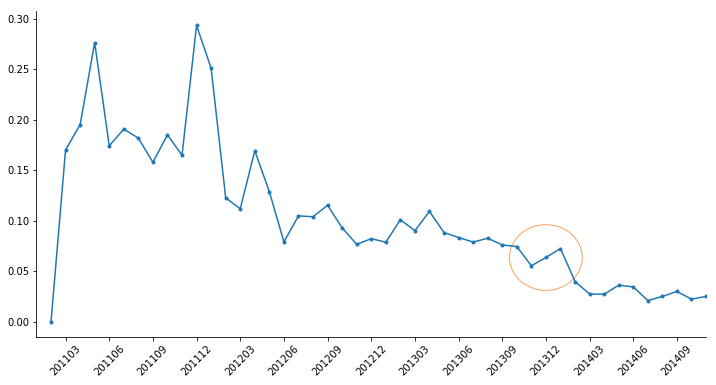

In [106]:
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".") # kind is bydefault Line
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),
                 5, 0.065, color='sandybrown', fill=False) # 5 is width and 0.065 is height of circle
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()
plt.show()

We may have noticed a few things:

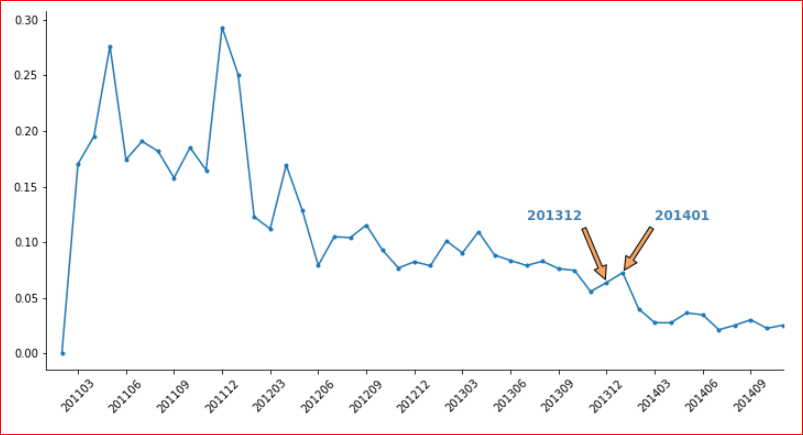

* The churn rate is very erratic at the beginning;
* In the months prior to we taking over the business in January of 2013, the churn rate started to become more stable.
* After we took over the business, there was a spike in churn. This is not surprising, maybe people just took the opportunity to change gyms or quit.
* At the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate.

It had been almost one year since we had taken over the business, so we naturally decide to investigate what could have led to this spike.

Due to our domain knowledge and intuition, we suspect that drilling down into the behavior of the churn rate by type of suscription (monthly vs. annual) may give us some clues. We repeat the analysis for each of these segments. Here are the graphs we obtained:

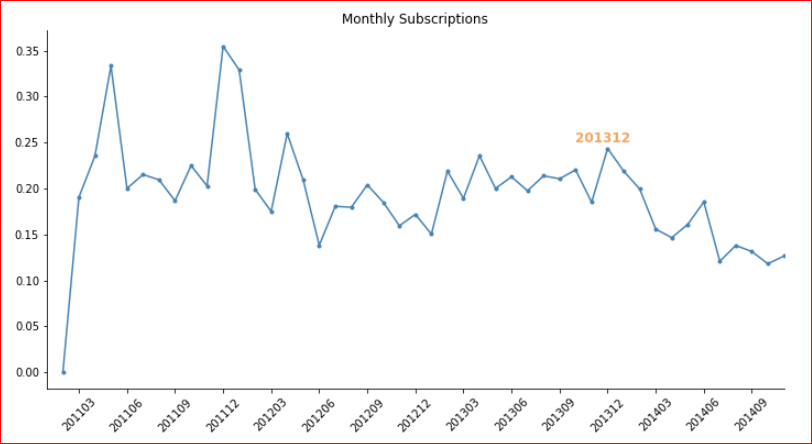

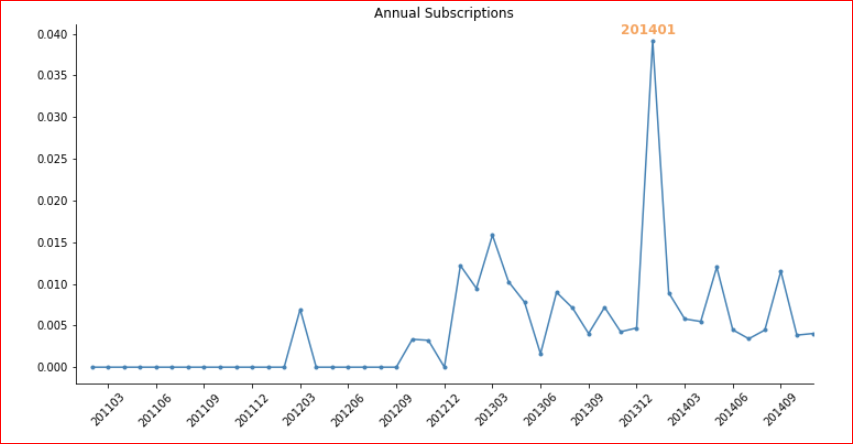

It seems the spike in churn originates from the monthly plans in December and from the annual plans in January. Our intuition was correct!

Looking at the annual graph we immediately remember that when we took over the business in January of 2013, we made a promo where people could sign up for a year for `$`500. What we're seeing here is the churn due to that promotion. Maybe people don't want to pay `$`50 per month, or maybe they had already quit a few months prior.

A few actions that we could take to reactivate these customers are:

* Make a new promotion specifically for the quitters.
* Make a new promotion specifically for the customers who attended the gym up until the end.
* Throw in some perks in addition to the standard service for the customers who didn't quit.

As for the monthly plan churned customers, we think back to recent changes in the service to try to figure out why they quit. Nothing comes to mind, we have no idea.

We decide to reach out to these customers and offer them a one-day pass for the gym in exchange for their feedback. Hopefully we can get some insights and act on them.

Overall, we've been doing a good job of keeping our customers. In addition to being a `fit creative genius`, we also are an entrepreneur — life isn't fair.

Notice how we finished above with possible actions: churn rate is actionable. Moreover, it satisfies most, if not all, of the other requirements for what makes a good metric:

* Accurate
* Simple and intelligible
* Easy to drill down into
* Actionable
* Dynamic
* Standardized
* Business oriented

It should come as no surprise that retaining our customers is important. Let's bring some clarity into this by specifying some reasons why reducing churn is important:

* The more customers we lose, the smaller the pool of potential customers becomes. Depending on the industry and kind of business, we can even run the risk of completely exhausting the pool of potential customers.
* In the scenario we just saw, the potential pool of customers are the people that live sufficiently close to the gym. If we lose all of them, we're going to have a hard time getting customers.
* In the case of subscription based products, current customers are more likely to buy the more expensive products than new customers.
* Churn rate informs how happy customers are with our product.
* Research has shown that retaining existing customers is more profitable than acquiring new customers due primarily to savings on acquisition costs, the higher volume of service consumption, and customer referrals ([source](https://journals.lib.unb.ca/index.php/JCIM/article/view/442)).
* Happy customers provide free advertising.

Gauging churn rates, just like NPS, is also industry-dependent:

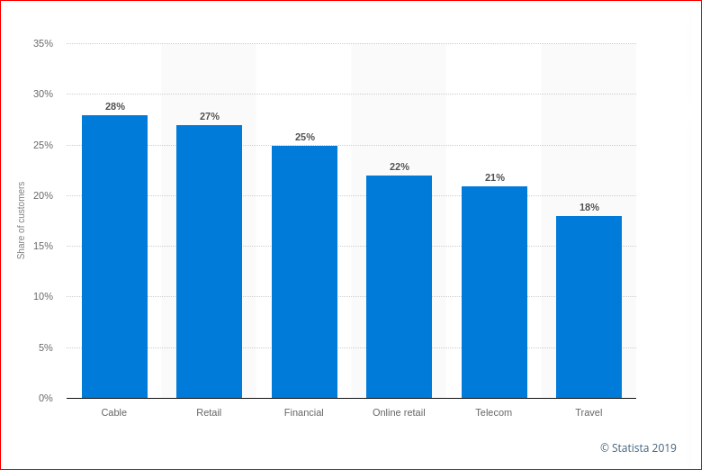

In this file we learned:

* What makes a good metric
* About the net promoter score
* About churn rate


